### 3.3 고유값 분해
#### 고유값과 고유벡터
$$ Au = \lambda u $$
위 식을 만족 하는 실수 $\lambda $를 고유값(eigenvalue), 벡터 u를 고유벡터(eigenvector)라고 한다. 고유값고 고유벡터를 찾는 작업을 고유분해(eigen-decomposition) 또는 고유값 분해(eigenvalue decomposition)라고 한다.
$$ Au - \lambda u = (A - \lambda I)u = 0 $$

#### 특성방정식
행렬 A의 고유값은 A - $\lambda I$의 행렬식이 0이 되도록 하는 **특성방정식(characteristic equation)**의 해를 구하면 된다.
$$ det(A - \lambda I) = 0 $$
이 조건은 행렬 $A - \lambda I$가 역행렬이 존재하지 않는다는 뜻이다. 만약 $A - \lambda I$의 역행렬이 존재한다면 고유값 조건을 만족하는 벡터가 항상 영벡터가 되기 때문이다.
$$ (A - \lambda I)^{-1}(A - \lambda I)u = 0 \rightarrow u = 0 $$
이차방정식 해를 최대 2개 가질 수 있지만, 하나만 존재 할 경우 **중복고유값(repeated eigenvalue)**라고 한다.


#### 고유값 개수
N차방정식이 항상 N개의 복소수 해를 가진다는 사실을 이용하면 N차원 정방행렬의 고윳값의 개수에 대해
다음 정리가 성립한다.
```
[정리] 중복된 고윳값을 각각 별개로 생각하고 복소수인 고윳값도 고려한다면 N차원 정방행렬의 고윳값은 항상 N개다.
```
고유값과 대각합/행렬식
어떤 행렬의 고유값이 $\lambda_1,\lambda_2,\cdots,\lambda_N$이라고 하면 모든 고유값의 곱은 행렬식의 값(determinant)과 같고 모든 고유값의 합은 대각합(trace)갑과 같다
$$ det(A) = \prod_{i=1}^{N} \lambda_i $$
$$ tr(A) = \sum_{i=1}^{N} \lambda_i $$
고유벡터의 계산
$$ (A - \lambda I)u = 0 $$

#### 넘파이를 사용한 고유분해
넘파이의 linalg 서브패키지에서는 고유값과 고유벡터를 구할 수 있는 eig()명령을 제공한다. 고유값은 벡터의 형태로, 고유벡터는 고유벡터 행렬의 형태로 묶여서 나오고 고유벡터는 크기가 1인 단위 벡터로 정규화가 되어 있다. 실수인 고유값이 존재하지 않는 행렬에 대해서는 복소수인 고유값과 고유벡터를 계산한다.
eig() 명령의 결과로 나오는 고유벡터 행렬은 행이 아니라 **열을 고유벡터로 가진다**는 점에 주의한다. 수치계산의 오류로 인해 중복되는 고유값이 미세하게 다른 값으로 계산될 수도 있다.

In [1]:
A = np.array([[1, -2], [2, -3]])
w1, V1 = np.linalg.eig(A)
print(w1)
print(V1)
# 부동소수점의 오차로 인해 -0.9999998과 -1.00000002의 값이 나왔으나 둘다 -1이다.

[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


In [2]:
B = np.array([[2, 3], [2, 1]])
w2, V2 = np.linalg.eig(B)
print(w2)
print(V2)

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [3]:
C = np.array([[0, -1], [1, 0]])
w3, V3 = np.linalg.eig(C)
print(w3)
print(V3)


[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


#### 대각화(diagonalization)
N차원의 정방행렬 A가 N개의 복소수 고db값과 이에 대응하는 고유벡터를 가진다는 성질을 이용하면 다음
처럼 행렬을 분해할 수 있다.
행렬 A의 고유값과 이에 대응하는 단위벡터인 고유벡터를 각각 
$$ \lambda_1,\lambda_2,\cdots,\lambda_N   u_1,u_2,\cdots,u_N $$
이라고 하자.
이 고유값과 고유벡터를 묶어서 다음과 같이 고유벡터행렬, 고유값행렬을 정의할 수 있다.
고유벡터행렬 V은 고유벡터를 열벡터로 옆으로 쌓아서 만든 행렬이다.
$$ \mathbf{V} = [u_1\cdots u_N] $$
$$ \mathbf{V} \in \mathbf{R}^{N \times N} $$
고유값행렬 A은 고유값을 대각성분으로 가지는 대각행렬이다.
$$ \mathbf{A} \in \mathbf{R}^{N \times N} $$
위와 같이 고유벡터행렬과 고유값행렬을 정의하면 행렬과 고유벡터행렬의 곱은 고유벡터행렬과 고유값행렬
의 곱과 같다.
$$ \mathbf{AV} = \mathbf{VA} $$
즉,
만약 고유벡터행렬 V의 역행렬이 존재한다면 행렬을 다음처럼 고유벡터행렬과 고유값행렬의 곱으로 표현할
수 있다. 이를 행렬의 대각화(diagonalization)라고 한다.
$$ \mathbf{A} = \mathbf{VA}\mathbf{V}^{-1} $$

# 중요
$$ \lambda는 복소수 $$
$$ \lambda는 N개 $$
$$ \mathbf{AV} = \mathbf{VA} $$
$$ det(A) = \prod_{i=1}^{N} \lambda_i $$
$$ tr(A) = \sum_{i=1}^{N} \lambda_i $$



In [4]:
V2

array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]])

In [5]:
V2_inv = np.linalg.inv(V2)
V2_inv
#역행렬 존재

array([[ 0.72111026,  0.72111026],
       [-0.56568542,  0.84852814]])

In [6]:
V2 @ np.diag(w2) @ V2_inv
# A = VAV(inv) 원래 행렬이 나옴

array([[2., 3.],
       [2., 1.]])

#### 대각화가능
```
[정리] 행렬이 대각화가능하려면 고유벡터가 선형독립이어야 한다.
```
행렬을 대각화할 수 있으면 **대각화가능(diagonalizable)** 행렬이라고 한다. 앞서 이야기했듯이 고유벡터인 열벡터로 이루어진 행렬에 역행렬이 존재하면 대각화가능이라고 했다. 그런데 앞절에서 정방행렬의 역행렬이
존재할 조건은 정방행렬의 열벡터 즉, 고유벡터들이 선형독립인 경우이다. 따라서 행렬이 대각화가능하려면
고유벡터가 선형독립이어야한다.
#### 고유값과 역행렬
```
[정리]대각화가능한 행렬에 0인 고유값이 없으면 항상 역행렬이 존재한다.
```
$$ \mathbf{A} = \mathbf{VA}\mathbf{V}^{-1} $$

#### 대칭행렬의 고유분해
```
[정리] 행렬A가 실수인 대칭행렬이면 고유값이 실수이고 고유벡터는 서로 직교(orthogonal)한다
```
만약 고유벡터들이 크기가 1이 되도록 정규화된 상태라면 고유벡터 행렬 V는 정규직교(orthonormal) 행렬이
므로 전치행렬이 역행렬이다.
$$ \mathbf{V}^T\mathbf{V} = \mathbf{V}\mathbf{V}^T = \mathbf{I} $$
$$ \mathbf{V}^{-1} = \mathbf{V}^T $$
$$ \mathbf{A} = \mathbf{VA}\mathbf{V}^T $$
```
[정리] 실수인 대칭행렬은 항상 대각화가능하다.
```

In [7]:
A = np.array([[60., 30., 20.],
 [30., 20., 15.],
 [20., 15., 12.]])
w, V = np.linalg.eig(A)
w1, w2, w3 = w
v1 = V[:, 0:1]
v2 = V[:, 1:2]
v3 = V[:, 2:3]
A1 = v1 @ v1.T
A2 = v2 @ v2.T
A3 = v3 @ v3.T

In [8]:
w

array([84.49913563,  7.33962395,  0.16124042])

In [9]:
w1 * A1

array([[57.79768857, 32.13739648, 22.59357583],
       [32.13739648, 17.8694387 , 12.56276371],
       [22.59357583, 12.56276371,  8.83200836]])

In [10]:
w2 * A2 

array([[ 2.19968372, -2.12270483, -2.60775134],
       [-2.12270483,  2.04841985,  2.51649195],
       [-2.60775134,  2.51649195,  3.09152039]])

In [11]:
w3 * A3

array([[ 0.00262772, -0.01469165,  0.01417551],
       [-0.01469165,  0.08214145, -0.07925566],
       [ 0.01417551, -0.07925566,  0.07647125]])

In [12]:
w3 * A3

array([[ 0.00262772, -0.01469165,  0.01417551],
       [-0.01469165,  0.08214145, -0.07925566],
       [ 0.01417551, -0.07925566,  0.07647125]])

In [13]:
w1 * A1 + w2 * A2 + w3 * A3

array([[60., 30., 20.],
       [30., 20., 15.],
       [20., 15., 12.]])

만약 0인 고유값이 없다면 역행렬도 다음처럼 N개의 랭크 행렬 $A_i = v_iv_i^{T}$
$$ A^{-1} = \mathbf{A} = \mathbf{VA}\mathbf{V}^T = \sum\limits_{i=1}^N \frac{1}{\lambda_i}v_i v_i^T = \frac{1}{\lambda_1}A_1 + \cdots + \frac{1}{\lambda_N}A_N $$

In [14]:
np.linalg.inv(A)

array([[ 0.15, -0.6 ,  0.5 ],
       [-0.6 ,  3.2 , -3.  ],
       [ 0.5 , -3.  ,  3.  ]])

In [15]:
1 / w1 * A1

array([[0.0080948 , 0.00450097, 0.00316432],
       [0.00450097, 0.00250269, 0.00175947],
       [0.00316432, 0.00175947, 0.00123696]])

In [16]:
1 / w2 * A2

array([[ 0.04083313, -0.03940415, -0.04840816],
       [-0.03940415,  0.03802519,  0.04671409],
       [-0.04840816,  0.04671409,  0.05738845]])

In [17]:
1 / w3 * A3

array([[ 0.10107208, -0.56509682,  0.54524384],
       [-0.56509682,  3.15947213, -3.04847356],
       [ 0.54524384, -3.04847356,  2.94137459]])

In [18]:
1 / w1 * A1 + 1 / w2 * A2 + 1 / w3 * A3

array([[ 0.15, -0.6 ,  0.5 ],
       [-0.6 ,  3.2 , -3.  ],
       [ 0.5 , -3.  ,  3.  ]])

## 대칭행렬의 고유값 부호(중요)
```
[정리] 대칭행렬이 양의 정부호(positive definite)이면 고윳값은 모두 양수다. 역도 성립한다.
[정리] 대칭행렬이 양의 준정부호(positive semidefinite)이면 고윳값은 모두 0이거나 양수다. 역도 성립한다
```
$ 대칭행렬 A = A^T $
$$ \lambda는 실수 $$
$$ V^T = V^{-1} $$
$$ \mathbf{A} = \mathbf{VA}\mathbf{V}^T $$
$$ \sum\limits_{i=1}^N \frac{1}{\lambda_i}v_i v_i^T $$


#### 분산행렬
분산행렬에서는 다음 정리가 성립한다.

$$[정리]행렬 \mathbf{X} \in \mathbf{R}^{N \times M}(N \geq M)가 풀랭크이면 이행렬의 분산행렬 \mathbf{X}^T\mathbf{X}의 역행렬이 존재한다. $$

행렬 $[정리]행렬 \mathbf{X} \in \mathbf{R}^{N \times M}(N \geq M)$가 풀랭크이면 X의 열벡터가 기저벡터를 이루기 때문에 영벡터가 아닌 모든 벡터 v에 대해 $X_v = u$는 영벡터가 될 수 없다. (만약 영벡터 u를 만드는 영벡터가 아닌 v가 존재한다면서 서로 독립이 아니다.)그러면 $\mathbf{X}^T\mathbf{X}$의 이차형식은 항상 양수가 된다.
$$ u^T(\mathbf{X}^T\mathbf{X})v = (\mathbf{X}u)^T(\mathbf{X}u) = u^Tu > 0 $$
따라서 분산행렬은 양의 정부호이고 역행렬이 존재한다.

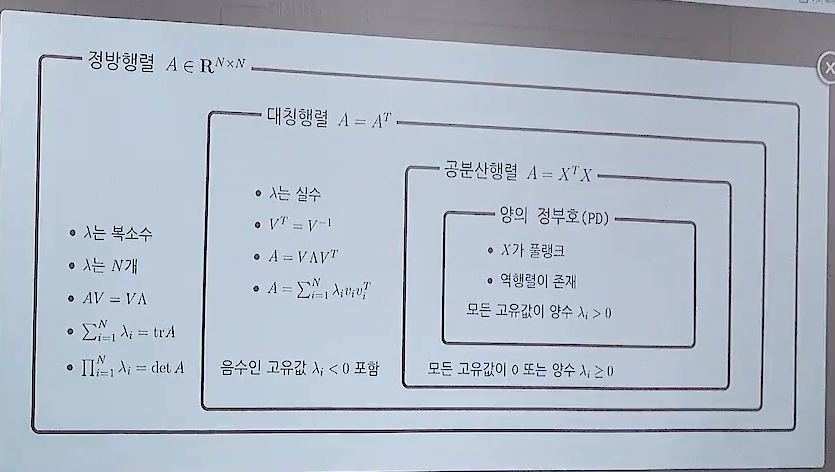

In [19]:
#중요
from IPython.display import Image 
Image('img/eigen&matrix.png')

### 특이값 분해
정방행렬은 공유분해로 고유값고 고유벡터를 찾을 수 있었다. 정방행렬이 아닌 행렬은 고유분해가 불가능하다. 하지만 고유분해와 비슷한 특이분해를 할 수 있다.

여기에서 $\mathbf{U},\sum,\mathbf{V}$
- 대각성분이 양수인 대각행렬이어야 한다. 큰 수부터 작은 수 순서로 배열한다.
$$\mathbf{U}\mathbf{\sum}\mathbf{V}^T$$
- $\mathbf{U}$는 $\mathbf{N}$차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 한다.
$$ \mathbf{U} \in \mathbf{R}^{N \times N} $$
- V는 M차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 한다. 
$$ V \in R^{M \times M} $$

위 조건을 만족하는 행렬 $\sum $의 대각성분들을 특이값(singular value), 행렬U의 열벡터들을 왼쪽 특이벡터(left singular vector), 행렬 V의 행벡터들을 오른쪽 특이벡터(right singular veㅊtor)라고 부른다
```
[정리] 특이부해는 모든 행렬에 대해 가능하다. 즉 어떤 행렬이 주어지더라도 위와 같이 특이분해할 수 있따.
```
** 특이값의 개수는 행렬의 열과 행의 개수 중 작은 값과 같다.**

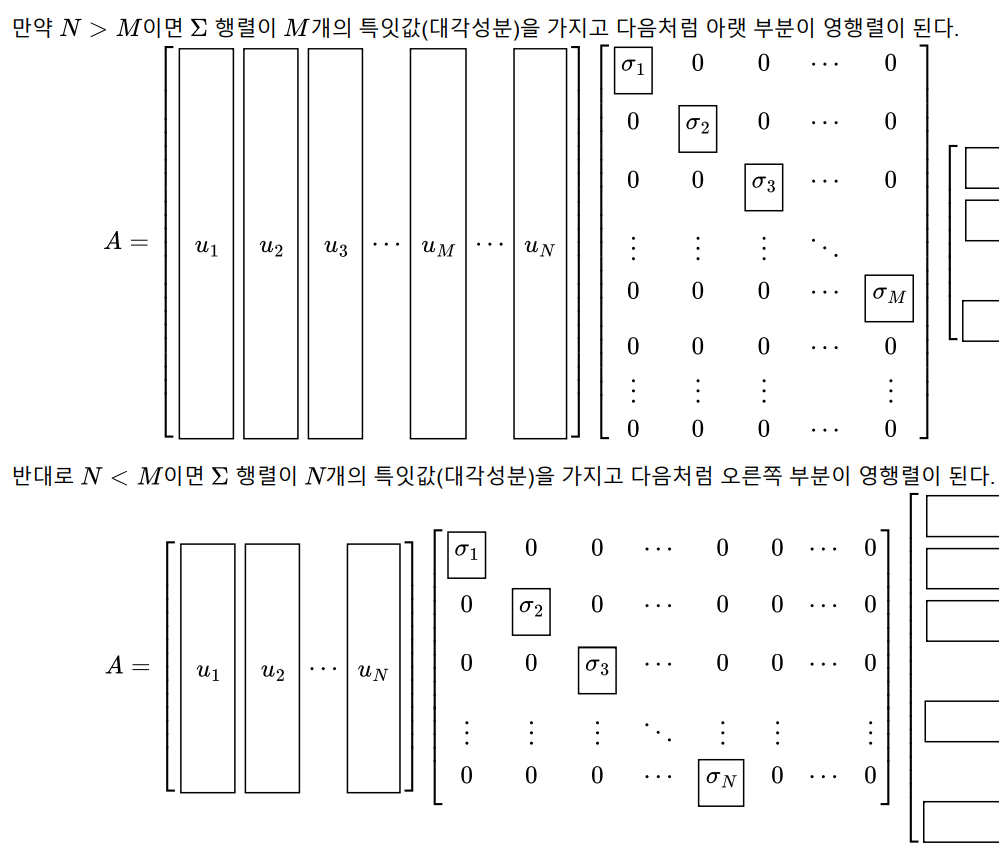

In [5]:
from IPython.display import Image
Image('img/singular_vector.png')


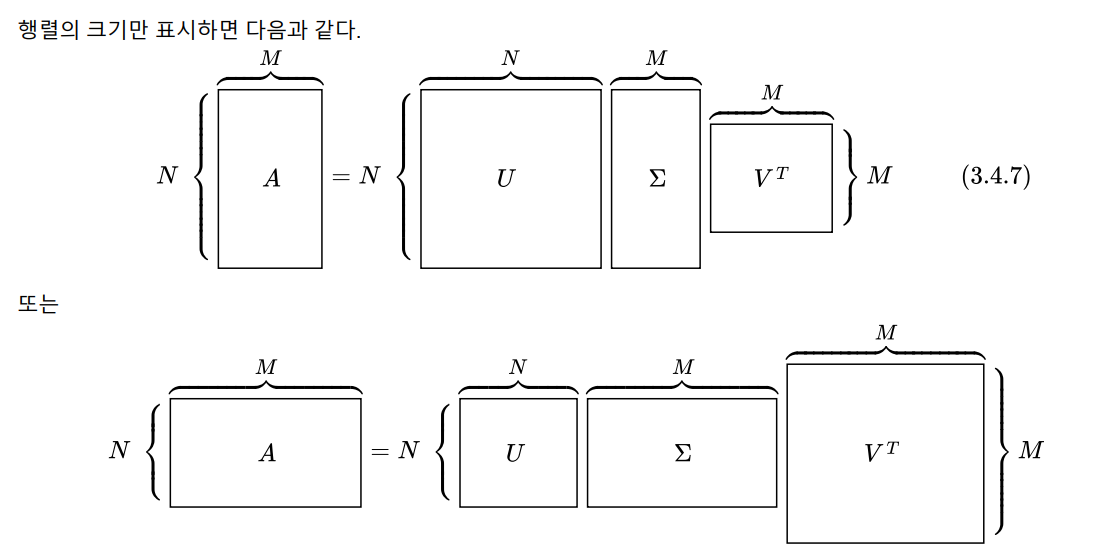

In [4]:
from IPython.display import Image
Image('img/singular_vector1.png')

특이값 대각행렬에서 0인 부분은 사실상 아무런 의미가 없기 때문에 대각행렬의 0 원소 부분과 이에 대흥하는 왼쪽(혹 오른쪽) 특이벡터들을 없애고 다음처럼 축소된 형태로 해도 마찬가지로 원래 행렬이 나온다.

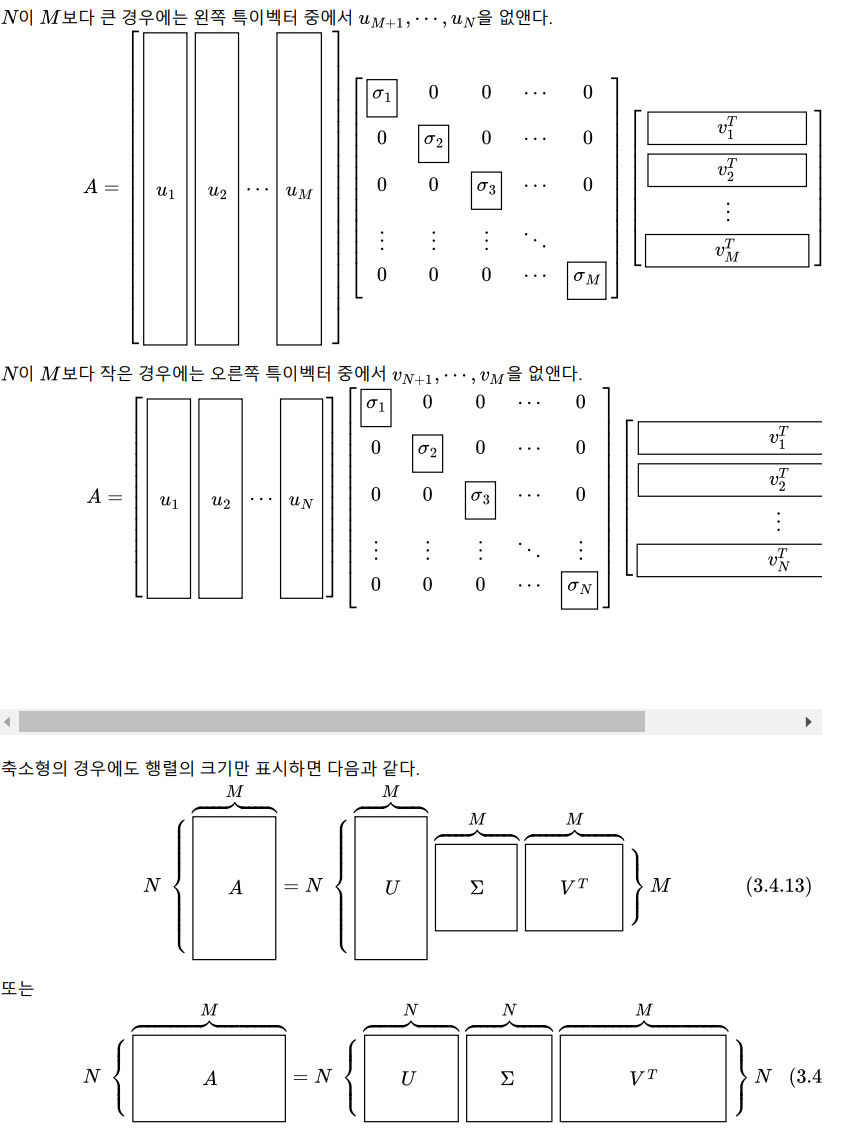

In [7]:
from IPython.display import Image
Image('img/singular_vector2.png')

#### 파이썬을 사용한 특이분해
numpy.linalg 서브패키지와 scipy.linalg 서브패키지에서는 특이분해를 할 수 있는 svd() 명령을 제공(오른쪽 특이행렬은 전치행렬)

In [8]:
from numpy.linalg import svd
A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

In [10]:
U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -1.94289029e-16,  9.12870929e-01]])

In [11]:
S

array([3.46410162, 3.16227766])

In [12]:
np.diag(S, 1)[:, 1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [13]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [14]:
U @ np.diag(S, 1)[:, 1:] @ VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [15]:
U2, S2, VT2 = svd(A, full_matrices=False) #축소형을 구할때 full_matrices=False

In [16]:
U2

array([[-4.08248290e-01,  8.94427191e-01],
       [-8.16496581e-01, -4.47213595e-01],
       [-4.08248290e-01, -1.94289029e-16]])

In [17]:
S2

array([3.46410162, 3.16227766])

In [18]:
VT2

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [19]:
U2 @ np.diag(S2) @ VT2

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [20]:
from numpy.linalg import svd

B = np.array([[3, 2, 2], [2, 3, -2]])
C = np.array([[2, 4], [1, 3], [0, 0], [0, 0]])

In [23]:
U, S, VT = svd(B)

print('B'); print(B)
print("\nU"); print(U)

B
[[ 3  2  2]
 [ 2  3 -2]]

U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [25]:
print("\nS"); print(np.diag(S, -1)[1:,:])
print("\nU"); print(VT.T)
print("\nU S VT"); print(U @ np.diag(S, -1)[1:, :] @ VT)


S
[[5. 0. 0.]
 [0. 3. 0.]]

U
[[ 7.07106781e-01 -2.35702260e-01 -6.66666667e-01]
 [ 7.07106781e-01  2.35702260e-01  6.66666667e-01]
 [ 3.67439059e-16 -9.42809042e-01  3.33333333e-01]]

U S VT
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [26]:
# B 행렬의 축소형 SVD
U, S, VT = svd(B, full_matrices=False)
print("\nB"); print(B)
print("\nU"); print(U)
print("\nS"); print(np.diag(S))
print("\nV"); print(VT.T)
print("\nU S VT"); print(U @ np.diag(S) @ VT)


B
[[ 3  2  2]
 [ 2  3 -2]]

U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

S
[[5. 0.]
 [0. 3.]]

V
[[ 7.07106781e-01 -2.35702260e-01]
 [ 7.07106781e-01  2.35702260e-01]
 [ 3.67439059e-16 -9.42809042e-01]]

U S VT
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


#### 특이값과 특이벡터의 관계
행렬 V는 정규직교(orthonormal)행렬이므로 전치행렬이 역행렬이다.
$$ V^T =V^{-1} $$
특이분해된 등식의 양변에 를 곱하면,
$$ AV = U\sum V^TV = \mathbf{U}\sum  \leftrightarrow AV = VA $$

#### 특이분해와 고유분해의 관계
행렬 A의 분산행렬 $A^TA$는
$$ A^TA= VAV^T $$
가 되어 행렬 A의 특이값의 제곱(과 0)이 분산행렬 $A^TA$의 고유값, 행렬 A의 오른쪽 특이벡터가 분산행렬 $A^TA$의 고유벡터가 된다.

In [27]:
w, V = np.linalg.eig(A.T @ A)

In [28]:
w # A.T A의 고윳값

array([12., 10.])

In [29]:
S ** 2 # A의 특잇값의 제곱

array([25.,  9.])

In [30]:
V # A.T A의 고유벡터

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [31]:
VT.T # A의 오른쪽 특이벡터

array([[ 7.07106781e-01, -2.35702260e-01],
       [ 7.07106781e-01,  2.35702260e-01],
       [ 3.67439059e-16, -9.42809042e-01]])

##### 1차원 근사
2차원 평면 위에 3개의 2차원 벡터 $a_1,a_2,a_3$가 있다. 원점을 지나면서 모든 점들과 가능한 한 가까이 있는 직선을 만들고 싶다면 직선의 방향을 어떻게 해야 할까? 직선의 방향을 나타내는 단위 벡터를 w라고 하자

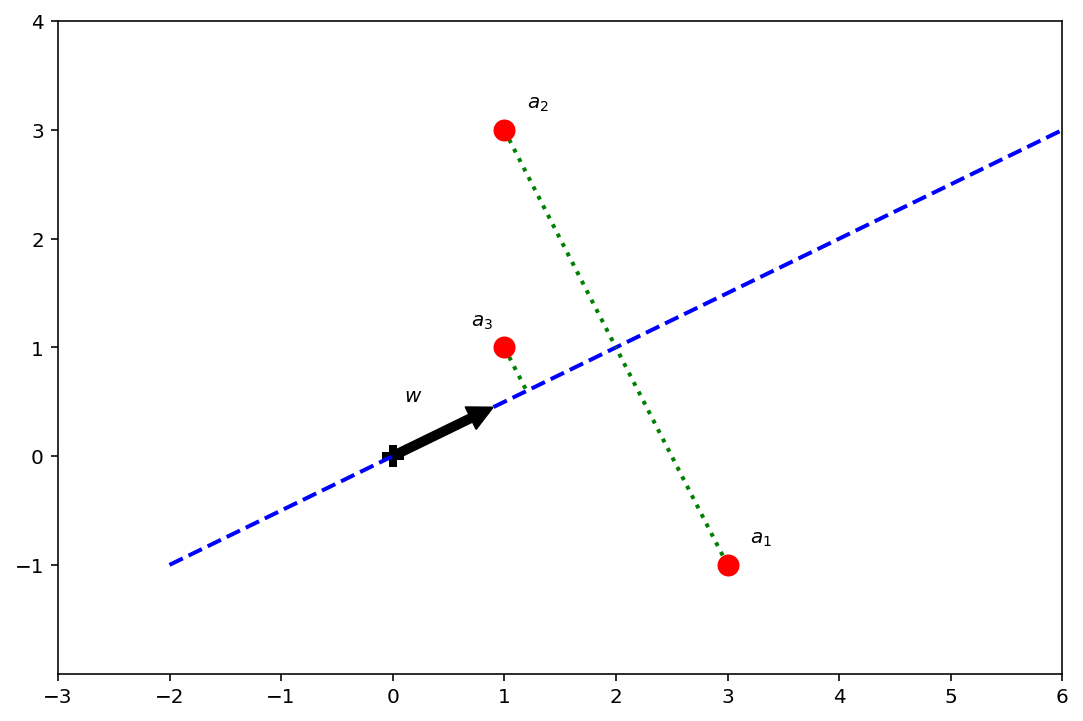

In [32]:
w = np.array([2, 1]) / np.sqrt(5)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])
black = {"facecolor": "black"}
plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 8], [-1, 4], 'b--', lw=2)
plt.plot([a1[0], 2], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 1], 'g:', lw=2)
plt.plot([a3[0], 1.2], [a3[1], 0.6], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()

$ \Vert Aw \Vert$의 값이 가장 크게 만드는 w를 찾아야 하는데 w는 2차원 벡터이므로 2차원 평면공간의 기저벡터인 $v_1, v_2 $의 선형조합으로 표현할 수 있다.
$$ w = w_1v_2 + w_2Wv_2 $$
단, w도 단위벡터이므로 $ w_1,w_2 $는 다음 조건을 만족해야한다.
 $$ w_1^2 + w_2^2 = 1 $$
이때 $\Vert Aw \Vert $의 값은
$$ \Vert Aw \Vert^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 $$ 
거리의 제곱의 합
$$ \Vert A \Vert^2 - \Vert Aw \Vert^2 = \Vert A \Vert^2 - \sigma_1^2 $$

In [33]:
np.linalg.norm(A)**2 - S[0]**2

-3.000000000000007

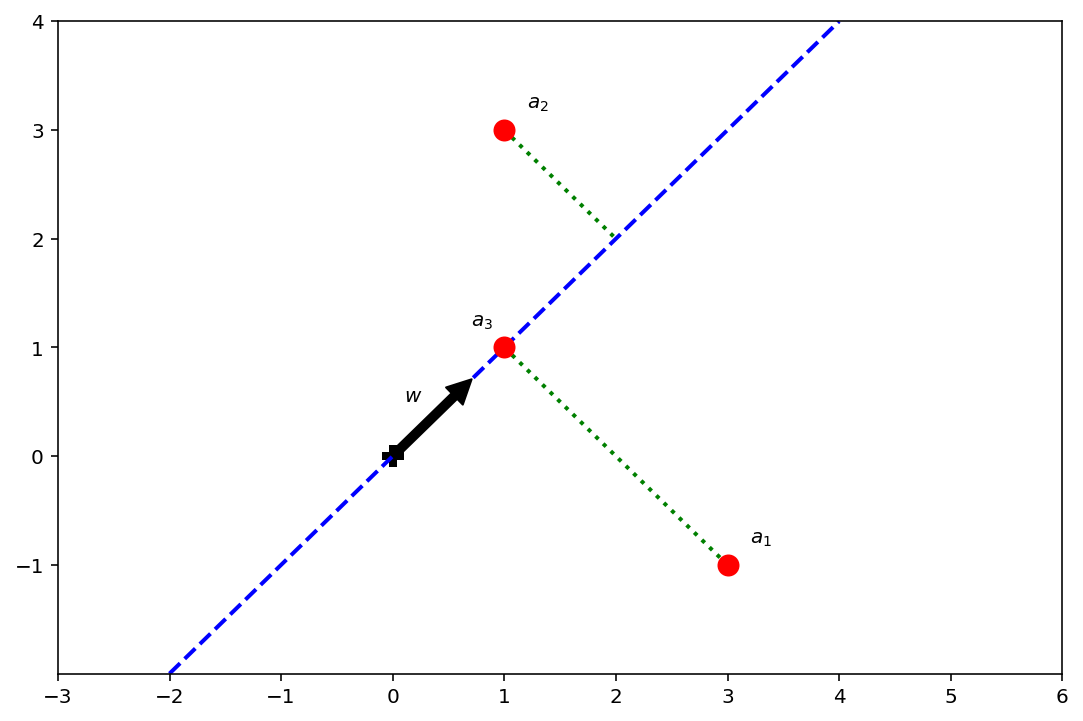

In [35]:
w = np.array([1, 1]) / np.sqrt(2)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])
black = {"facecolor": "black"}
plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 4], [-2, 4], 'b--', lw=2)
plt.plot([a1[0], 1], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 2], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()

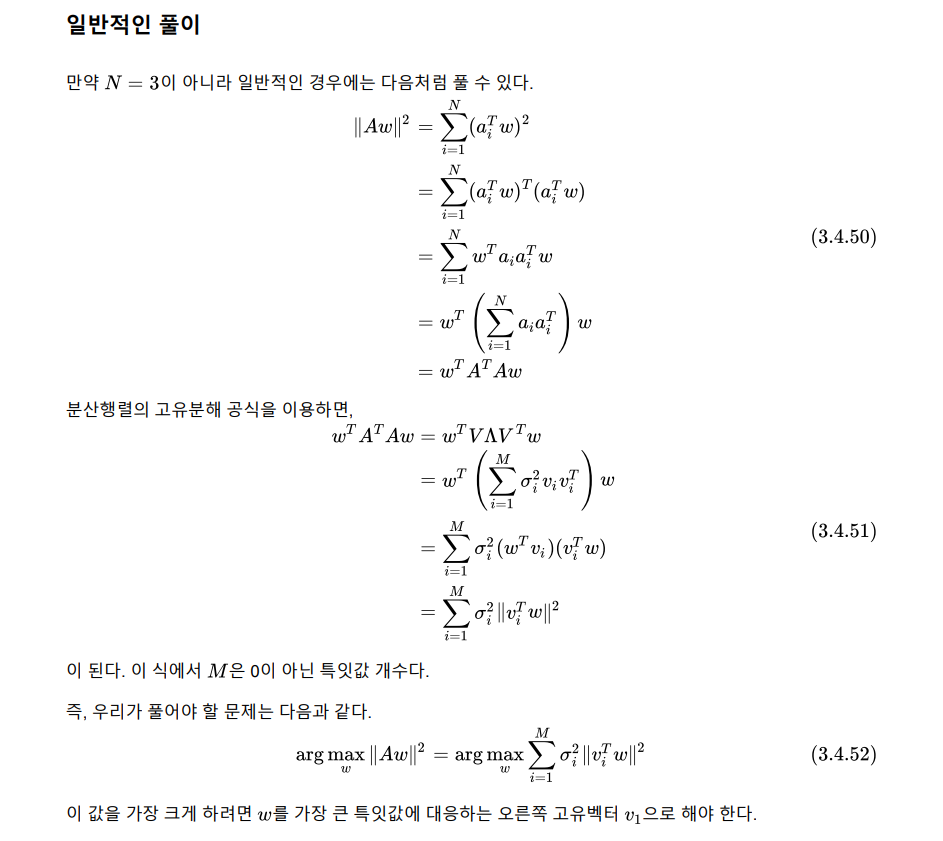

In [37]:
from IPython.display import Image
Image('img/singular_vector3.png')

#### K차원근사
$$ \sum\limits_{k=1}^N\Vert a_i^{\Vert w}\Vert^2  = \sum\limits_{k=1}^K w_k^TA^TAw_k = \sum\limits_{k=1}^K\sum\limits_{i=1}^M\sigma_i^2\Vert v_i^Tw_k \Vert^2 $$